**Partie 1**

In [330]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [331]:
X = [[0, 0], [1, 1]]
y = [0, 1]

In [332]:
clf = clf.fit(X, y)

In [333]:
clf.predict([[2.,2.]])

array([1])

In [334]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

**Classification des données Iris**

In [335]:
from sklearn.datasets import load_iris

In [336]:
iris = load_iris()
X, y = iris.data, iris.target

In [337]:
data = pd.DataFrame(X)
data = data.reset_index(drop = True)

In [338]:
data.columns = ["Sepal length","Sepal width","Petal length","Petal width"]

In [339]:
data.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [340]:
sum(iris.target == 2)

50

In [341]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state =2)

In [343]:
clf = tree.DecisionTreeClassifier()

In [344]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9, 'X[2] <= 2.35\ngini = 0.666\nsamples = 105\nvalue = [33, 35, 37]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.5, 0.7, 'X[3] <= 1.65\ngini = 0.5\nsamples = 72\nvalue = [0, 35, 37]'),
 Text(0.2, 0.5, 'X[2] <= 4.95\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.3, 0.3, 'X[3] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.7, 0.3, 'X[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

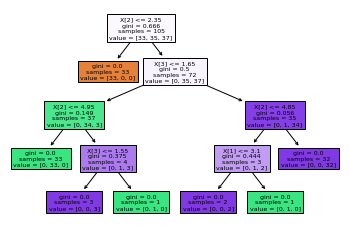

In [345]:
tree.plot_tree(clf, filled=True )

In [346]:
clf.predict(X_test)

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

In [347]:
clf.score(X_test, y_test)

0.9555555555555556

Impact des paramètres depth et leaf

In [348]:
clf = tree.DecisionTreeClassifier(max_depth =3, min_samples_leaf = 20)

In [349]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.35\ngini = 0.666\nsamples = 105\nvalue = [33, 35, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.65\ngini = 0.5\nsamples = 72\nvalue = [0, 35, 37]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

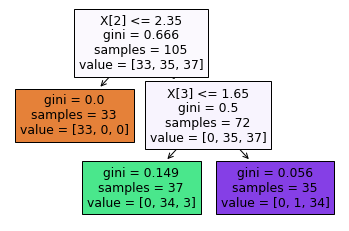

In [350]:
tree.plot_tree(clf, filled = True)

Question : Le problème ici étant particulièrement simple, refaites une division 
apprentissage/test avec 5% des données en apprentissage et 95% test. 
Calculez le taux d’éléments mal classifiés sur l’ensemble de test. 
Faites  varier  (ou  mieux,  réalisez  une  recherche  par  grille  avec  GridSearchCV)  les 
valeurs des paramètres max_depth et min_samples_leaf pour mesurer leur impact sur 
ce score.

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.95, random_state =2)

In [352]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.875

In [361]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 5)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

1.0

In [372]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 

In [373]:
dt = tree.DecisionTreeClassifier()

parameters = {'max_depth':[2,5,10,15,20], 'min_samples_leaf':[2,5,10,15,20]}
clf = GridSearchCV(dt, parameters)
clf.fit(X_train, y_train)
grid = GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=parameters)
sorted(clf.cv_results_.keys())

grid.fit(X_train, y_train) 
grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         0
           2       1.00      0.67      0.80         3

    accuracy                           0.88         8
   macro avg       0.67      0.56      0.60         8
weighted avg       1.00      0.88      0.93         8



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [374]:
clf.best_params_

{'max_depth': 2, 'min_samples_leaf': 2}

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
 
# Paramètres 
n_classes = 3 
plot_colors = "bry" # blue-red-yellow 
plot_step = 0.02 
 
# Choisir les attributs longueur et largeur des pétales 
pair = [2, 3] 
 
# On ne garde seulement les deux attributs 
X = iris.data[:, pair] 
y = iris.target 
 
def arbre_decision(X,y):
  # Apprentissage de l'arbre 
  clf = tree.DecisionTreeClassifier().fit(X, y) 
  
  # Affichage de la surface de décision 
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
  xx,  yy  =  np.meshgrid(np.arange(x_min,  x_max,  plot_step),  np.arange(y_min, 
  y_max, plot_step)) 
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
  Z = Z.reshape(xx.shape) 
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
  plt.xlabel(iris.feature_names[pair[0]]) 
  plt.ylabel(iris.feature_names[pair[1]]) 
  plt.axis("tight") 
  
  # Affichage des points d'apprentissage 
  for i, color in zip(range(n_classes), plot_colors): 
      idx = np.where(y == i) 
      plt.scatter(X[idx,  0],  X[idx,  1],  c=color,  label=iris.target_names[i], 
  cmap=plt.cm.Paired) 
  plt.axis("tight") 
  plt.suptitle("Decision surface of a decision tree using paired features") 
  plt.legend() 
  plt.show()


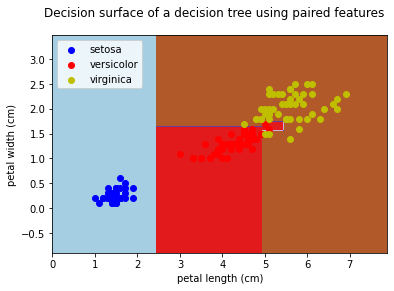

In [ ]:
arbre_decision(X,y)

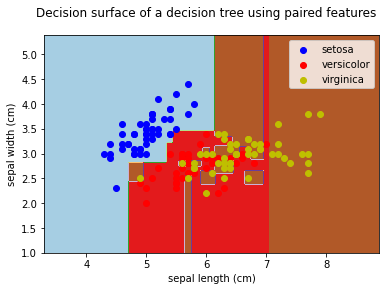

In [ ]:
# Choisir les attributs longueur et largeur des pétales 
pair = [0, 1] 
 
# On ne garde seulement les deux attributs 
X = iris.data[:, pair] 
y = iris.target 

arbre_decision(X,y)

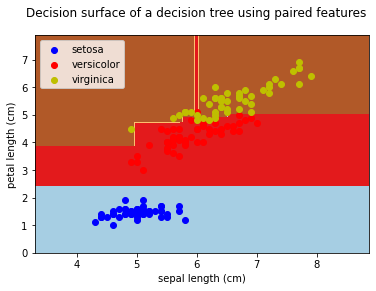

In [ ]:
# Choisir les attributs longueur et largeur des pétales 
pair = [0, 2] 
 
# On ne garde seulement les deux attributs 
X = iris.data[:, pair] 
y = iris.target 

arbre_decision(X,y)

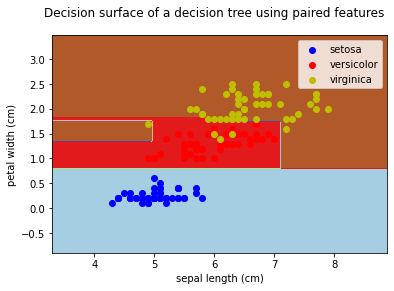

In [ ]:
# Choisir les attributs longueur et largeur des pétales 
pair = [0, 3] 
 
# On ne garde seulement les deux attributs 
X = iris.data[:, pair] 
y = iris.target 

arbre_decision(X,y)

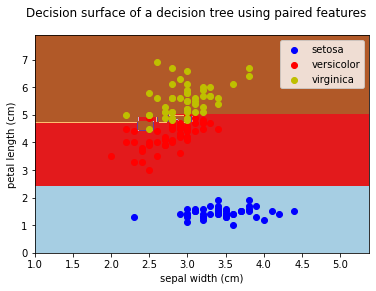

In [ ]:
# Choisir les attributs longueur et largeur des pétales 
pair = [1, 2] 
 
# On ne garde seulement les deux attributs 
X = iris.data[:, pair] 
y = iris.target 

arbre_decision(X,y)

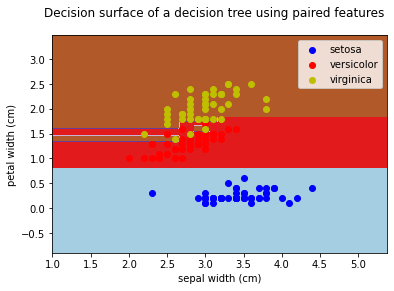

In [ ]:
# Choisir les attributs longueur et largeur des pétales 
pair = [1, 3] 
 
# On ne garde seulement les deux attributs
X = iris.data[:, pair] 
y = iris.target 

arbre_decision(X,y)

In [ ]:
from sklearn import tree 
 
X = [[0, 0], [2, 2]] 
y = [0.5, 2.5] 
clf = tree.DecisionTreeRegressor() 
clf = clf.fit(X, y) 
clf.predict([[1, 1]])

array([0.5])

Text(0.5, 1.0, 'Signal sinusoïdal bruité')

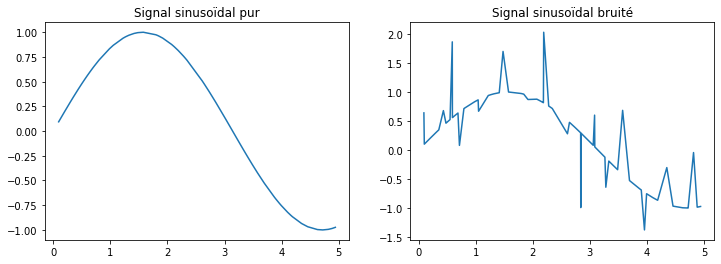

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
 
from sklearn.tree import DecisionTreeRegressor 
 
# Créer les données d'apprentissage 
np.random.seed(0) 
X = np.sort(5 * np.random.rand(80, 1), axis=0) 
y = np.sin(X).ravel() 
fig = plt.figure(figsize=(12, 4)) 
fig.add_subplot(121) 
plt.plot(X, y) 
plt.title("Signal sinusoïdal pur") 
 
# On ajoute un bruit aléatoire tous les 5 échantillons 
y[::5] += 3 * (0.5 - np.random.rand(16)) 
fig.add_subplot(122) 
plt.plot(X, y) 
plt.title("Signal sinusoïdal bruité")

In [ ]:
def ad_reg(X,y,nb):  
  # Apprendre le modèle 
  reg = DecisionTreeRegressor(max_depth=nb) 
  reg.fit(X, y) 
  
  # Prédiction sur la même plage de valeurs 
  X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] 
  y_pred = reg.predict(X_test) 
  
  # Affichage des résultats 
  plt.figure() 
  plt.scatter(X, y, c="darkorange", label="Exemples d'apprentissage") 
  plt.plot(X_test, y_pred, color="cornflowerblue", label="Prédiction", 
  linewidth=2) 
  plt.xlabel("x") 
  plt.ylabel("y") 
  plt.title("Régression par un arbre de décision") 
  plt.legend() 
  plt.show()

Question : 
Changer la valeur du paramètre max_depth. Que se passe-t-il si on prend une valeur 
trop  grande  ?  Trop  petite  ?  Changer  le  taux  d’éléments  affectés  par  le  bruit 
(le y[::5]). Quand tous les éléments sont affectés par le bruit, faut-il préférer une 
valeur élevée ou faible pour max_depth ? 
 
Question : 
Pour approfondir, chargez la base de données Diabètes du 
module sklearn.datasets et faire une partition aléatoire en partie apprentissage et 
partie  test  (70%  apprentissage,  30%  test).  Construire  un  modèle  d’arbre  de 
regression sur cette base. Calculer l’erreur quadratique moyenne sur l’ensemble 
de test. Faire un grid search pour trouver la valeur du paramètre max_depth qui 
minimise cette erreur.

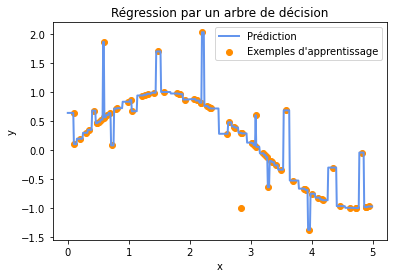

In [ ]:
ad_reg(X,y,15)

Text(0.5, 1.0, 'Signal sinusoïdal bruité')

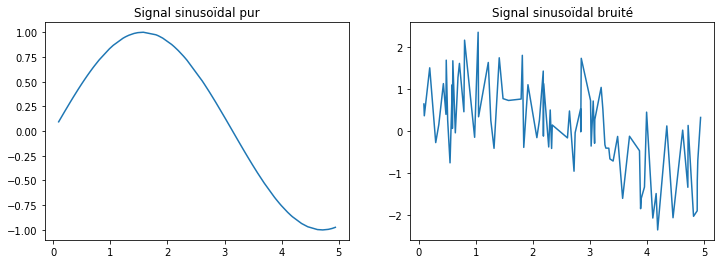

In [ ]:
# Créer les données d'apprentissage 
np.random.seed(0) 
X = np.sort(5 * np.random.rand(80,1), axis=0) 
y = np.sin(X).ravel() 
fig = plt.figure(figsize=(12, 4)) 
fig.add_subplot(121) 
plt.plot(X, y) 
plt.title("Signal sinusoïdal pur") 
 
# On ajoute un bruit aléatoire tous les 5 échantillons 
y[::1] += 3 * (0.5 - np.random.rand(80)) 
fig.add_subplot(122) 
plt.plot(X, y) 
plt.title("Signal sinusoïdal bruité")

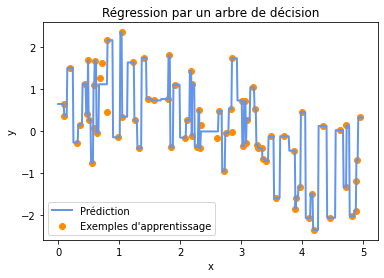

In [ ]:
ad_reg(X,y,10)

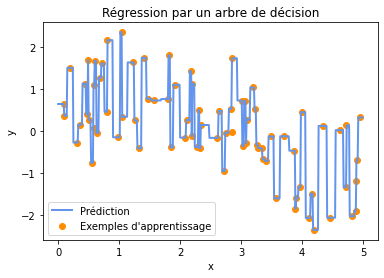

In [ ]:
ad_reg(X,y,30)

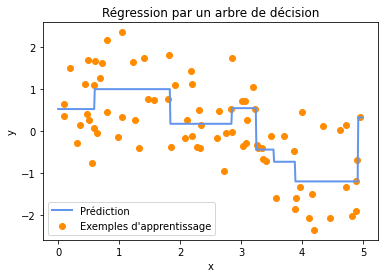

In [ ]:
ad_reg(X,y,3)

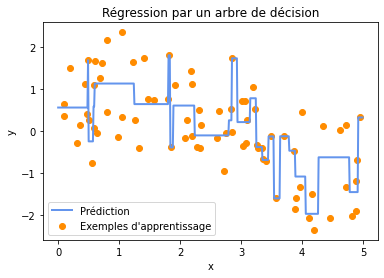

In [ ]:
ad_reg(X,y,5)

In [ ]:
from sklearn.datasets import load_diabetes
import numpy as np

In [ ]:
X,y = load_diabetes(return_X_y=True)

In [ ]:
np.isnan(X).sum()

0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 2)

In [ ]:
print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (309, 10)
y_train shape:  (309,)
x_test shape:  (133, 10)
y_test shape:  (133,)


In [ ]:
reg = DecisionTreeRegressor(max_depth = 3) 
reg.fit(X_train, y_train) 

y_pred = reg.predict(X_test) 

In [ ]:
from sklearn.metrics import mean_squared_error

print('mse (sklearn): ', mean_squared_error(y_test,y_pred))

mse (sklearn):  4013.1980383232108


In [382]:
dt = tree.DecisionTreeClassifier()


parameters = {'max_depth':[2,5,10,15,20,50,100]}
clf=GridSearchCV(dt,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=3,verbose=3)
clf.fit(X_train, y_train)
grid = GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=parameters)
sorted(clf.cv_results_.keys())

grid.fit(X_train, y_train) 
grid_predictions = grid.predict(X_test) 

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 1/3] END ......................max_depth=2;, score=-0.204 total time=   0.0s
[CV 2/3] END ......................max_depth=2;, score=-0.146 total time=   0.0s
[CV 3/3] END ......................max_depth=2;, score=-0.326 total time=   0.0s
[CV 1/3] END ......................max_depth=5;, score=-0.204 total time=   0.0s
[CV 2/3] END ......................max_depth=5;, score=-0.206 total time=   0.0s
[CV 3/3] END ......................max_depth=5;, score=-0.292 total time=   0.0s
[CV 1/3] END .....................max_depth=10;, score=-0.144 total time=   0.0s
[CV 2/3] END .....................max_depth=10;, score=-0.206 total time=   0.0s
[CV 3/3] END .....................max_depth=10;, score=-0.292 total time=   0.0s
[CV 1/3] END .....................max_depth=15;, score=-0.204 total time=   0.0s
[CV 2/3] END .....................max_depth=15;, score=-0.253 total time=   0.0s
[CV 3/3] END .....................max_depth=15;, 

In [383]:
clf.best_params_

{'max_depth': 50}

In [384]:
clf.best_score_

-0.2010891309563736